In [120]:
# 패키지 가져오기
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import time

In [121]:
# Warning 메시지를 무시하기 위한 설정
import warnings
warnings.filterwarnings('ignore')

In [122]:
# CSV 데이터 읽기
data = pd.read_csv("C:\\Users\\gadi2\\OneDrive\\바탕 화면\\study file\\Module36\\train.csv")
df=data

In [123]:
# 데이터 미리보기
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [124]:
# 데이터 정보 미리보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [125]:
# 누락된 값 확인
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [126]:
df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [127]:
# 데이터셋을 훈련 세트와 검증 세트로 나누기 (train_test_split 사용)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [108]:
# 원하는 클러스터 수 지정
desired_clusters = 6
scaler = StandardScaler()

# K-Means 클러스터링을 적용합니다.
k_means = KMeans(n_clusters=desired_clusters)
y_clust = k_means.fit_predict(rn_scaled)

In [109]:
# K-Means 클러스터링을 적용합니다.
k_means = KMeans(n_clusters=desired_clusters)
y_clust = k_means.fit_predict(rn_scaled)


In [110]:
# Elbow Method를 사용하여 최적의 클러스터 수를 찾습니다.
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rn_scaled)
    distortions.append(kmeans.inertia_)

    print(distortions)

[2028258.0000000002]
[2028258.0000000002, 1160092.9826413977]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585, 899591.8507178309]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585, 899591.8507178309, 878377.1465195736]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585, 899591.8507178309, 878377.1465195736, 859939.7475858897]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585, 899591.8507178309, 878377.1465195736, 859939.7475858897, 847207.5082670922]
[2028258.0000000002, 1160092.9826413977, 1030742.0639542078, 978773.1530138785, 928146.4158701585, 899591.850717

In [111]:
# K-Means의 최적 n_clusters 값 확인
# 이 코드에서는 기울기가 급격하게 변하는 지점을 찾아서 최적의 클러스터 수를 결정합니다.

# K-Means 결과를 분석하여 교차 빈도를 보여주는 테이블을 작성합니다.
cluster_df = pd.DataFrame({'Cluster': k_means.labels_, 'activity': Labels})
cluster_table = pd.crosstab(cluster_df['Cluster'], cluster_df['activity'])

In [112]:
# 다양한 성능 평가 지표를 사용하여 결과를 평가합니다.
homogeneity = homogeneity_score(Labels, y_clust)
completeness = completeness_score(Labels, y_clust)
v_measure = v_measure_score(Labels, y_clust)
adjusted_rand = adjusted_rand_score(Labels, y_clust)
adjusted_mutual_info = adjusted_mutual_info_score(Labels, y_clust)
silhouette = silhouette_score(rn_scaled, y_clust, metric='euclidean')

In [113]:
# PCA를 사용하여 데이터를 차원 축소하고 K-Means 결과를 비교합니다.
pca = PCA(n_components=2)
rn_pca = pca.fit_transform(rn_scaled)
y_pca_clust = k_means.fit_predict(rn_pca)

In [114]:
# 11. 다양한 차원 변경 후 결과를 확인합니다.

# 12. K-Means 학습 시간을 측정합니다.
start_time = time.time()
for _ in range(10):
    k_means.fit(rn_scaled)
end_time = time.time()
fit_time = end_time - start_time

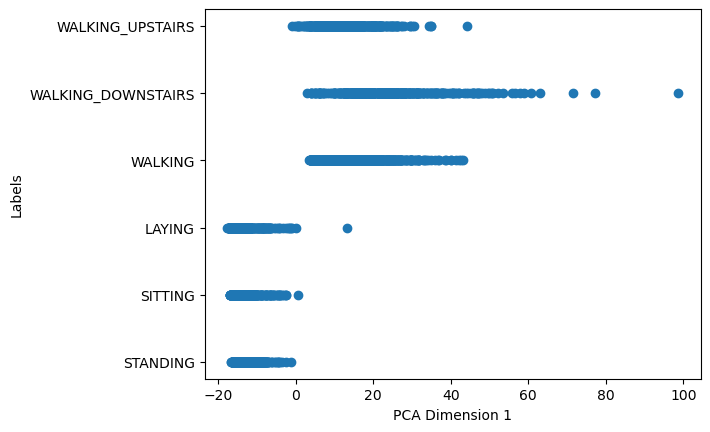

In [115]:
# PCA를 이용하여 1차원 데이터를 시각화합니다.
plt.scatter(rn_pca[:, 0], Labels)
plt.xlabel('PCA Dimension 1')
plt.ylabel('Labels')
plt.show()

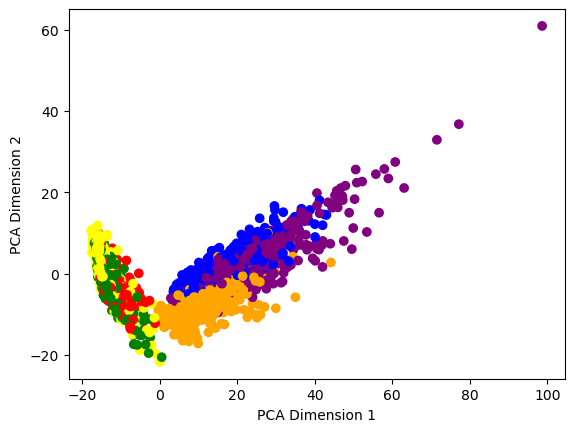

In [116]:
# 활동 유형에 따라 색상 지정
color_dict = {
    'STANDING': 'red',
    'WALKING': 'blue',
    'SITTING': 'green',
    'LAYING': 'yellow',
    'WALKING_UPSTAIRS': 'orange',
    'WALKING_DOWNSTAIRS': 'purple',
    # 데이터셋에 있는 모든 활동 유형에 대해 적절한 색상 추가
}

# 활동 유형에 따라 색상 리스트 생성 (알 수 없는 활동 유형은 기본 색상으로 처리)
colors = [color_dict.get(label, 'gray') for label in Labels]

# PCA를 이용하여 2차원 데이터를 시각화합니다.
plt.scatter(rn_pca[:, 0], rn_pca[:, 1], c=colors)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()